##### Copyright 2019 The TensorFlow Authors.


In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Load CSV data

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/csv"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/load_data/csv.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial provides examples of how to use CSV data with TensorFlow.

There are two main parts to this:

1. **Loading the data off disk**
2. **Pre-processing it into a form suitable for training.**

This tutorial focuses on the loading, and gives some quick examples of preprocessing. To learn more about the preprocessing aspect, check out the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.


## Setup

In [2]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

2022-12-14 03:19:21.501439: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 03:19:21.501547: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 03:19:21.501557: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## In memory data

For any small CSV dataset the simplest way to train a TensorFlow model on it is to load it into memory as a pandas Dataframe or a NumPy array.


A relatively simple example is the [abalone dataset](https://archive.ics.uci.edu/ml/datasets/abalone).

* The dataset is small.
* All the input features are all limited-range floating point values.

Here is how to download the data into a [pandas `DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [3]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


The dataset contains a set of measurements of [abalone](https://en.wikipedia.org/wiki/Abalone), a type of sea snail.

![an abalone shell](https://tensorflow.org/images/abalone_shell.jpg)

 [“Abalone shell”](https://www.flickr.com/photos/thenickster/16641048623/) (by [Nicki Dugan Pogue](https://www.flickr.com/photos/thenickster/), CC BY-SA 2.0)


The nominal task for this dataset is to predict the age from the other measurements, so separate the features and labels for training:


In [4]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

For this dataset you will treat all features identically. Pack the features into a single NumPy array.:

In [5]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

Next make a regression model predict the age. Since there is only a single input tensor, a `tf.keras.Sequential` model is sufficient here.

In [6]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

To train that model, pass the features and labels to `Model.fit`:

In [7]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10


  1/104 [..............................] - ETA: 2:08 - loss: 102.9977

 25/104 [======>.......................] - ETA: 0s - loss: 99.7766   

 50/104 [=============>................] - ETA: 0s - loss: 87.4094

 75/104 [====================>.........] - ETA: 0s - loss: 75.3149

101/104 [============================>.] - ETA: 0s - loss: 64.2537

104/104 [==============================] - 1s 2ms/step - loss: 63.2037


Epoch 2/10


  1/104 [..............................] - ETA: 0s - loss: 21.8071

 27/104 [======>.......................] - ETA: 0s - loss: 16.3162

 53/104 [==============>...............] - ETA: 0s - loss: 13.2174

 79/104 [=====================>........] - ETA: 0s - loss: 12.1574

104/104 [==============================] - 0s 2ms/step - loss: 11.4377


Epoch 3/10


  1/104 [..............................] - ETA: 0s - loss: 6.3147

 27/104 [======>.......................] - ETA: 0s - loss: 8.5652

 53/104 [==============>...............] - ETA: 0s - loss: 8.3947

 79/104 [=====================>........] - ETA: 0s - loss: 8.0983

104/104 [==============================] - 0s 2ms/step - loss: 8.3538


Epoch 4/10


  1/104 [..............................] - ETA: 0s - loss: 4.7016

 27/104 [======>.......................] - ETA: 0s - loss: 7.5084

 54/104 [==============>...............] - ETA: 0s - loss: 7.9252

 81/104 [======================>.......] - ETA: 0s - loss: 8.0271

104/104 [==============================] - 0s 2ms/step - loss: 7.9212


Epoch 5/10


  1/104 [..............................] - ETA: 0s - loss: 10.6526

 27/104 [======>.......................] - ETA: 0s - loss: 7.5414 

 53/104 [==============>...............] - ETA: 0s - loss: 7.7221

 80/104 [======================>.......] - ETA: 0s - loss: 7.8326

104/104 [==============================] - 0s 2ms/step - loss: 7.5364


Epoch 6/10


  1/104 [..............................] - ETA: 0s - loss: 7.0346

 27/104 [======>.......................] - ETA: 0s - loss: 7.1406

 54/104 [==============>...............] - ETA: 0s - loss: 7.5536

 81/104 [======================>.......] - ETA: 0s - loss: 7.1604

104/104 [==============================] - 0s 2ms/step - loss: 7.2160


Epoch 7/10


  1/104 [..............................] - ETA: 0s - loss: 8.3676

 28/104 [=======>......................] - ETA: 0s - loss: 7.4450

 54/104 [==============>...............] - ETA: 0s - loss: 7.2056

 80/104 [======================>.......] - ETA: 0s - loss: 7.1563

104/104 [==============================] - 0s 2ms/step - loss: 6.9713


Epoch 8/10


  1/104 [..............................] - ETA: 0s - loss: 9.8982

 28/104 [=======>......................] - ETA: 0s - loss: 6.4373

 54/104 [==============>...............] - ETA: 0s - loss: 6.5985

 80/104 [======================>.......] - ETA: 0s - loss: 6.6079

104/104 [==============================] - 0s 2ms/step - loss: 6.7949


Epoch 9/10


  1/104 [..............................] - ETA: 0s - loss: 7.5401

 28/104 [=======>......................] - ETA: 0s - loss: 6.9776

 54/104 [==============>...............] - ETA: 0s - loss: 6.4763

 80/104 [======================>.......] - ETA: 0s - loss: 6.6432

104/104 [==============================] - 0s 2ms/step - loss: 6.6579


Epoch 10/10


  1/104 [..............................] - ETA: 0s - loss: 9.6794

 27/104 [======>.......................] - ETA: 0s - loss: 6.9180

 53/104 [==============>...............] - ETA: 0s - loss: 6.4575

 79/104 [=====================>........] - ETA: 0s - loss: 6.4374

104/104 [==============================] - 0s 2ms/step - loss: 6.5545


You have just seen the most basic way to train a model using CSV data. Next, you will learn how to apply preprocessing to normalize numeric columns.

## Basic preprocessing

It's good practice to normalize the inputs to your model. The Keras preprocessing layers provide a convenient way to build this normalization into your model.

The `tf.keras.layers.Normalization` layer precomputes the mean and variance of each column, and uses these to normalize the data.

First, create the layer:

In [8]:
normalize = layers.Normalization()

Then, use the `Normalization.adapt` method to adapt the normalization layer to your data.

Note: Only use your training data with the `PreprocessingLayer.adapt` method. Do not use your validation or test data.

In [9]:
normalize.adapt(abalone_features)

Then, use the normalization layer in your model:

In [10]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10


  1/104 [..............................] - ETA: 1:09 - loss: 102.1927

 24/104 [=====>........................] - ETA: 0s - loss: 105.0044  

 49/104 [=============>................] - ETA: 0s - loss: 101.7692

 75/104 [====================>.........] - ETA: 0s - loss: 98.9649 

100/104 [===========================>..] - ETA: 0s - loss: 93.9676

104/104 [==============================] - 1s 2ms/step - loss: 93.4121


Epoch 2/10


  1/104 [..............................] - ETA: 0s - loss: 73.5219

 26/104 [======>.......................] - ETA: 0s - loss: 70.6172

 51/104 [=============>................] - ETA: 0s - loss: 66.0152

 76/104 [====================>.........] - ETA: 0s - loss: 60.1713

102/104 [============================>.] - ETA: 0s - loss: 54.3468

104/104 [==============================] - 0s 2ms/step - loss: 54.0416


Epoch 3/10


  1/104 [..............................] - ETA: 0s - loss: 38.7778

 27/104 [======>.......................] - ETA: 0s - loss: 26.2767

 53/104 [==============>...............] - ETA: 0s - loss: 22.0541

 78/104 [=====================>........] - ETA: 0s - loss: 19.1437

103/104 [============================>.] - ETA: 0s - loss: 16.4552

104/104 [==============================] - 0s 2ms/step - loss: 16.3732


Epoch 4/10


  1/104 [..............................] - ETA: 0s - loss: 14.4782

 26/104 [======>.......................] - ETA: 0s - loss: 6.6080 

 51/104 [=============>................] - ETA: 0s - loss: 6.2849

 75/104 [====================>.........] - ETA: 0s - loss: 5.9705

 99/104 [===========================>..] - ETA: 0s - loss: 5.9821

104/104 [==============================] - 0s 2ms/step - loss: 5.9246


Epoch 5/10


  1/104 [..............................] - ETA: 0s - loss: 2.7474

 26/104 [======>.......................] - ETA: 0s - loss: 5.1971

 51/104 [=============>................] - ETA: 0s - loss: 5.3519

 76/104 [====================>.........] - ETA: 0s - loss: 5.1933

101/104 [============================>.] - ETA: 0s - loss: 5.1354

104/104 [==============================] - 0s 2ms/step - loss: 5.1515


Epoch 6/10


  1/104 [..............................] - ETA: 0s - loss: 8.6929

 24/104 [=====>........................] - ETA: 0s - loss: 5.7033

 47/104 [============>.................] - ETA: 0s - loss: 5.2487

 70/104 [===================>..........] - ETA: 0s - loss: 5.2022

 94/104 [==========================>...] - ETA: 0s - loss: 5.1538

104/104 [==============================] - 0s 2ms/step - loss: 5.0754


Epoch 7/10


  1/104 [..............................] - ETA: 0s - loss: 2.8619

 25/104 [======>.......................] - ETA: 0s - loss: 5.2484

 49/104 [=============>................] - ETA: 0s - loss: 4.9953

 73/104 [====================>.........] - ETA: 0s - loss: 5.0756

 98/104 [===========================>..] - ETA: 0s - loss: 5.0985

104/104 [==============================] - 0s 2ms/step - loss: 5.0531


Epoch 8/10


  1/104 [..............................] - ETA: 0s - loss: 3.7007

 26/104 [======>.......................] - ETA: 0s - loss: 4.8217

 50/104 [=============>................] - ETA: 0s - loss: 5.0224

 74/104 [====================>.........] - ETA: 0s - loss: 4.9676

 98/104 [===========================>..] - ETA: 0s - loss: 4.9500

104/104 [==============================] - 0s 2ms/step - loss: 5.0092


Epoch 9/10


  1/104 [..............................] - ETA: 0s - loss: 2.9484

 25/104 [======>.......................] - ETA: 0s - loss: 4.8456

 48/104 [============>.................] - ETA: 0s - loss: 5.2006

 72/104 [===================>..........] - ETA: 0s - loss: 5.0732

 96/104 [==========================>...] - ETA: 0s - loss: 5.0161

104/104 [==============================] - 0s 2ms/step - loss: 4.9848


Epoch 10/10


  1/104 [..............................] - ETA: 0s - loss: 5.7434

 24/104 [=====>........................] - ETA: 0s - loss: 5.1598

 47/104 [============>.................] - ETA: 0s - loss: 5.0149

 69/104 [==================>...........] - ETA: 0s - loss: 4.9680

 93/104 [=========================>....] - ETA: 0s - loss: 5.0876

104/104 [==============================] - 0s 2ms/step - loss: 4.9846


## Mixed data types

The "Titanic" dataset contains information about the passengers on the Titanic. The nominal task on this dataset is to predict who survived.

![The Titanic](images/csv/Titanic.jpg)

Image [from Wikimedia](https://commons.wikimedia.org/wiki/File:RMS_Titanic_3.jpg)

The raw data can easily be loaded as a Pandas `DataFrame`, but is not immediately usable as input to a TensorFlow model.


In [11]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

Because of the different data types and ranges, you can't simply stack the features into a NumPy array and pass it to a `tf.keras.Sequential` model. Each column needs to be handled individually.

As one option, you could preprocess your data offline (using any tool you like) to convert categorical columns to numeric columns, then pass the processed output to your TensorFlow model. The disadvantage to that approach is that if you save and export your model the preprocessing is not saved with it. The Keras preprocessing layers avoid this problem because they're part of the model.


In this example, you'll build a model that implements the preprocessing logic using [Keras functional API](https://www.tensorflow.org/guide/keras/functional). You could also do it by [subclassing](https://www.tensorflow.org/guide/keras/custom_layers_and_models).

The functional API operates on "symbolic" tensors. Normal "eager" tensors have a value. In contrast these "symbolic" tensors do not. Instead they keep track of which operations are run on them, and build a representation of the calculation, that you can run later. Here's a quick example:

In [13]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor: shape=(None,) dtype=float32 (created by layer 'tf.__operators__.add')>

In [14]:
calc = tf.keras.Model(inputs=input, outputs=result)

In [15]:
print(calc(1).numpy())
print(calc(2).numpy())

3.0


5.0


To build the preprocessing model, start by building a set of symbolic `tf.keras.Input` objects, matching the names and data-types of the CSV columns.

In [16]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'sex')>,
 'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'n_siblings_spouses': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'n_siblings_spouses')>,
 'parch': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'parch')>,
 'fare': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'fare')>,
 'class': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'class')>,
 'deck': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'deck')>,
 'embark_town': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'embark_town')>,
 'alone': <KerasTensor: shape=(None, 1) dtype=string (created by layer 'alone')>}

The first step in your preprocessing logic is to concatenate the numeric inputs together, and run them through a normalization layer:

In [17]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'normalization_1')>

Collect all the symbolic preprocessing results, to concatenate them later:

In [18]:
preprocessed_inputs = [all_numeric_inputs]

For the string inputs use the `tf.keras.layers.StringLookup` function to map from strings to integer indices in a vocabulary. Next, use `tf.keras.layers.CategoryEncoding` to convert the indexes into `float32` data appropriate for the model.

The default settings for the `tf.keras.layers.CategoryEncoding` layer create a one-hot vector for each input. A `tf.keras.layers.Embedding` would also work. Check out the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial for more on this topic.

In [19]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue
  
  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

With the collection of `inputs` and `preprocessed_inputs`, you can concatenate all the preprocessed inputs together, and build a model that handles the preprocessing:

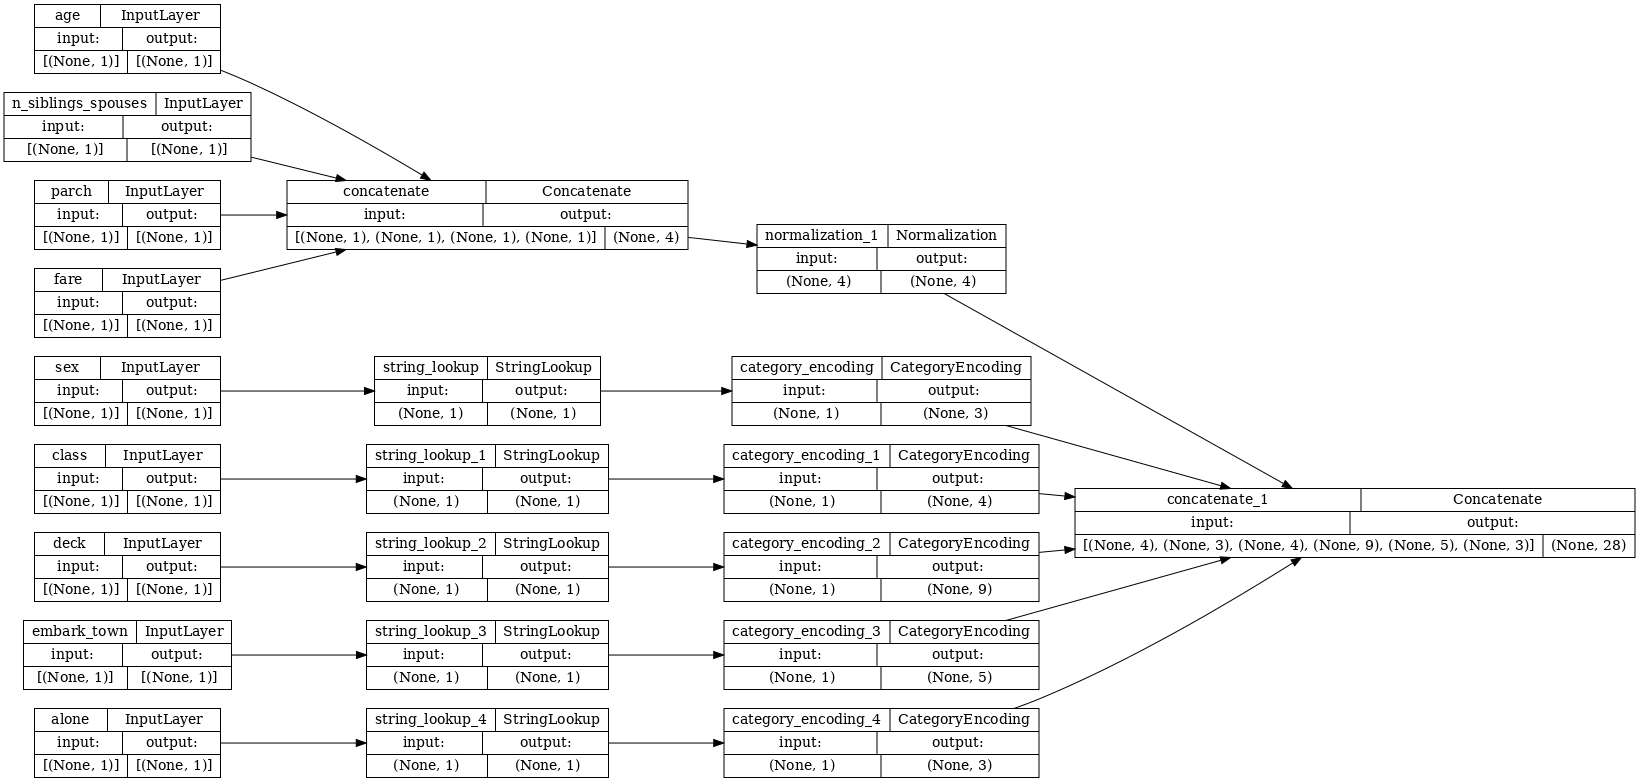

In [20]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

This model just contains the input preprocessing. You can run it to see what it does to your data. Keras models don't automatically convert pandas `DataFrame`s because it's not clear if it should be converted to one tensor or to a dictionary of tensors. So, convert it to a dictionary of tensors:

In [21]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

Slice out the first training example and pass it to this preprocessing model, you see the numeric features and string one-hots all concatenated together:

In [22]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

Now, build the model on top of this:

In [23]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

When you train the model, pass the dictionary of features as `x`, and the label as `y`.

In [24]:
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10


 1/20 [>.............................] - ETA: 20s - loss: 0.7565

13/20 [==================>...........] - ETA: 0s - loss: 0.6535 

20/20 [==============================] - 1s 4ms/step - loss: 0.6330


Epoch 2/10


 1/20 [>.............................] - ETA: 0s - loss: 0.5940

13/20 [==================>...........] - ETA: 0s - loss: 0.5484

20/20 [==============================] - 0s 4ms/step - loss: 0.5395


Epoch 3/10


 1/20 [>.............................] - ETA: 0s - loss: 0.4132

14/20 [====================>.........] - ETA: 0s - loss: 0.4753

20/20 [==============================] - 0s 4ms/step - loss: 0.4940


Epoch 4/10


 1/20 [>.............................] - ETA: 0s - loss: 0.4613

14/20 [====================>.........] - ETA: 0s - loss: 0.4739

20/20 [==============================] - 0s 4ms/step - loss: 0.4648


Epoch 5/10


 1/20 [>.............................] - ETA: 0s - loss: 0.4338

14/20 [====================>.........] - ETA: 0s - loss: 0.4381

20/20 [==============================] - 0s 4ms/step - loss: 0.4465


Epoch 6/10


 1/20 [>.............................] - ETA: 0s - loss: 0.2930

14/20 [====================>.........] - ETA: 0s - loss: 0.4499

20/20 [==============================] - 0s 4ms/step - loss: 0.4376


Epoch 7/10


 1/20 [>.............................] - ETA: 0s - loss: 0.3932

14/20 [====================>.........] - ETA: 0s - loss: 0.4192

20/20 [==============================] - 0s 4ms/step - loss: 0.4308


Epoch 8/10


 1/20 [>.............................] - ETA: 0s - loss: 0.5304

14/20 [====================>.........] - ETA: 0s - loss: 0.4250

20/20 [==============================] - 0s 4ms/step - loss: 0.4277


Epoch 9/10


 1/20 [>.............................] - ETA: 0s - loss: 0.3889

14/20 [====================>.........] - ETA: 0s - loss: 0.4189

20/20 [==============================] - 0s 4ms/step - loss: 0.4239


Epoch 10/10


 1/20 [>.............................] - ETA: 0s - loss: 0.3333

14/20 [====================>.........] - ETA: 0s - loss: 0.4339

20/20 [==============================] - 0s 4ms/step - loss: 0.4226


Since the preprocessing is part of the model, you can save the model and reload it somewhere else and get identical results:

In [25]:
titanic_model.save('test')
reloaded = tf.keras.models.load_model('test')

INFO:tensorflow:Assets written to: test/assets


In [26]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-1.972]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.972]], shape=(1, 1), dtype=float32)


## Using tf.data


In the previous section you relied on the model's built-in data shuffling and batching while training the model.

If you need more control over the input data pipeline or need to use data that doesn't easily fit into memory: use `tf.data`.

For more examples, refer to the [`tf.data`: Build TensorFlow input pipelines](../../guide/data.ipynb) guide.

### On in memory data

As a first example of applying `tf.data` to CSV data, consider the following code to manually slice up the dictionary of features from the previous section. For each index, it takes that index for each feature:


In [27]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

Run this and print the first example:

In [28]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


The most basic `tf.data.Dataset` in memory data loader is the `Dataset.from_tensor_slices` constructor. This returns a `tf.data.Dataset` that implements a generalized version of the above `slices` function, in TensorFlow.

In [29]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

You can iterate over a `tf.data.Dataset` like any other python iterable:

In [30]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


The `from_tensor_slices` function can handle any structure of nested dictionaries or tuples. The following code makes a dataset of `(features_dict, labels)` pairs:

In [31]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

To train a model using this `Dataset`, you'll need to at least `shuffle` and `batch` the data.

In [32]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

Instead of passing `features` and `labels` to `Model.fit`, you pass the dataset:

In [33]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5


 1/20 [>.............................] - ETA: 7s - loss: 0.4969

13/20 [==================>...........] - ETA: 0s - loss: 0.4366

20/20 [==============================] - 0s 4ms/step - loss: 0.4221


Epoch 2/5


 1/20 [>.............................] - ETA: 0s - loss: 0.3033

14/20 [====================>.........] - ETA: 0s - loss: 0.4043

20/20 [==============================] - 0s 4ms/step - loss: 0.4209


Epoch 3/5


 1/20 [>.............................] - ETA: 0s - loss: 0.4288

14/20 [====================>.........] - ETA: 0s - loss: 0.4201

20/20 [==============================] - 0s 4ms/step - loss: 0.4204


Epoch 4/5


 1/20 [>.............................] - ETA: 0s - loss: 0.3851

14/20 [====================>.........] - ETA: 0s - loss: 0.4366

20/20 [==============================] - 0s 4ms/step - loss: 0.4204


Epoch 5/5


 1/20 [>.............................] - ETA: 0s - loss: 0.5421

14/20 [====================>.........] - ETA: 0s - loss: 0.4122

20/20 [==============================] - 0s 4ms/step - loss: 0.4206


### From a single file

So far this tutorial has worked with in-memory data. `tf.data` is a highly scalable toolkit for building data pipelines, and provides a few functions for dealing loading CSV files. 

In [34]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

 8192/30874 [======>.......................] - ETA: 0s

30874/30874 [==============================] - 0s 0us/step


Now read the CSV data from the file and create a `tf.data.Dataset`.

(For the full documentation, see `tf.data.experimental.make_csv_dataset`)


In [35]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


This function includes many convenient features, so the data is easy to work with. This includes:

* Using the column headers as dictionary keys.
* Automatically determining the type of each column.

Caution: Make sure to set the `num_epochs` argument in `tf.data.experimental.make_csv_dataset`, otherwise the default behavior for `tf.data.Dataset` is to loop endlessly.

In [36]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'male' b'female' b'male' b'female' b'male']
age                 : [52. 42. 26. 44. 32.]
n_siblings_spouses  : [0 1 0 0 0]
parch               : [0 0 0 0 0]
fare                : [30.5   26.    10.5   27.721  7.896]
class               : [b'First' b'Second' b'Second' b'First' b'Third']
deck                : [b'C' b'unknown' b'unknown' b'B' b'unknown']
embark_town         : [b'Southampton' b'Southampton' b'Southampton' b'Cherbourg' b'Southampton']
alone               : [b'y' b'n' b'y' b'y' b'y']

label               : [1 1 0 1 0]


Note: If you run the above cell twice it will produce different results. The default settings for `tf.data.experimental.make_csv_dataset` include `shuffle_buffer_size=1000`, which is more than sufficient for this small dataset, but may not be for a real-world dataset.

It can also decompress the data on the fly. Here's a gzipped CSV file containing the [metro interstate traffic dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

![A traffic jam.](images/csv/traffic.jpg)

Image [from Wikimedia](https://commons.wikimedia.org/wiki/File:Trafficjam.jpg)


In [37]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

  8192/405373 [..............................] - ETA: 0s

 81920/405373 [=====>........................] - ETA: 0s

303104/405373 [=====================>........] - ETA: 0s

405373/405373 [==============================] - 0s 0us/step


Set the `compression_type` argument to read directly from the compressed file:

In [38]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [263.21 279.04 270.82 269.45 284.7 ]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]


clouds_all          : [75 48 20  1 68]
weather_main        : [b'Clouds' b'Clouds' b'Clouds' b'Clear' b'Clouds']
weather_description : [b'broken clouds' b'scattered clouds' b'few clouds' b'sky is clear'
 b'broken clouds']
date_time           : [b'2013-11-12 01:00:00' b'2013-10-07 07:00:00' b'2012-11-17 09:00:00'
 b'2013-01-10 23:00:00' b'2013-06-08 04:00:00']

label               : [ 322 6527 3842 1070  414]


Note: If you need to parse those date-time strings in the `tf.data` pipeline, you can use `tfa.text.parse_time`.

### Caching

There is some overhead to parsing the CSV data. For small models this can be the bottleneck in training.

Depending on your use case, it may be a good idea to use `Dataset.cache` or `tf.data.Dataset.snapshot`, so that the CSV data is only parsed on the first epoch.

The main difference between the `cache` and `snapshot` methods is that `cache` files can only be used by the TensorFlow process that created them, but `snapshot` files can be read by other processes.

For example, iterating over the `traffic_volume_csv_gz_ds` 20 times may take around 15 seconds without caching, or about two seconds with caching.

In [39]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

.

.

.

.

.

.

.

.

..

..

...

..

..

..

...

..

...

..

...

..

..

..

...

..

...

..

..

..

..

..

..

..

..

...

..

..

..

..

..

..

..

..

...

..

..

...

..
CPU times: user 15.2 s, sys: 4.05 s, total: 19.3 s
Wall time: 11.2 s


Note: `Dataset.cache` stores the data from the first epoch and replays it in order. So, using the `cache` method disables any shuffles earlier in the pipeline. Below, `Dataset.shuffle` is added back in after `Dataset.cache`.

In [40]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

..................

...................

...................

....................

...................
CPU times: user 1.86 s, sys: 285 ms, total: 2.14 s
Wall time: 1.66 s


Note: The `tf.data.Dataset.snapshot` files are meant for *temporary* storage of a dataset while in use. This is *not* a format for long term storage. The file format is considered an internal detail, and not guaranteed between TensorFlow versions.

In [41]:
%%time
snapshotting = traffic_volume_csv_gz_ds.snapshot('titanic.tfsnap').shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............

...............

.................

.................

..................

.............
CPU times: user 2.75 s, sys: 898 ms, total: 3.65 s
Wall time: 1.91 s


If your data loading is slowed by loading CSV files, and `Dataset.cache` and `tf.data.Dataset.snapshot` are insufficient for your use case, consider re-encoding your data into a more streamlined format.

### Multiple files

All the examples so far in this section could easily be done without `tf.data`. One place where `tf.data` can really simplify things is when dealing with collections of files.

For example, the [character font images](https://archive.ics.uci.edu/ml/datasets/Character+Font+Images) dataset is distributed as a collection of csv files, one per font.

![Fonts](images/csv/fonts.jpg)

Image by <a href="https://pixabay.com/users/wilhei-883152/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=705667">Willi Heidelbach</a> from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=705667">Pixabay</a>

Download the dataset, and review the files inside:

In [42]:
fonts_zip = tf.keras.utils.get_file(
    'fonts.zip',  "https://archive.ics.uci.edu/ml/machine-learning-databases/00417/fonts.zip",
    cache_dir='.', cache_subdir='fonts',
    extract=True)

     8192/160313983 [..............................] - ETA: 0s

    81920/160313983 [..............................] - ETA: 3:06

   385024/160313983 [..............................] - ETA: 1:19

  1081344/160313983 [..............................] - ETA: 35s 

  2138112/160313983 [..............................] - ETA: 21s

  3923968/160313983 [..............................] - ETA: 13s

  7184384/160313983 [>.............................] - ETA: 8s 

 10264576/160313983 [>.............................] - ETA: 6s

 13377536/160313983 [=>............................] - ETA: 5s

 16490496/160313983 [==>...........................] - ETA: 4s

 19546112/160313983 [==>...........................] - ETA: 4s

 22659072/160313983 [===>..........................] - ETA: 3s

 25772032/160313983 [===>..........................] - ETA: 3s

 28729344/160313983 [====>.........................] - ETA: 3s

 31768576/160313983 [====>.........................] - ETA: 3s

 35028992/160313983 [=====>........................] - ETA: 3s

 38273024/160313983 [======>.......................] - ETA: 2s

 41369600/160313983 [======>.......................] - ETA: 2s

 44613632/160313983 [=======>......................] - ETA: 2s

 47726592/160313983 [=======>......................] - ETA: 2s

 50987008/160313983 [========>.....................] - ETA: 2s

 54116352/160313983 [=========>....................] - ETA: 2s

 57335808/160313983 [=========>....................] - ETA: 2s

 60563456/160313983 [==========>...................] - ETA: 2s

 63537152/160313983 [==========>...................] - ETA: 1s

 66519040/160313983 [===========>..................] - ETA: 1s

 69525504/160313983 [============>.................] - ETA: 1s

 72531968/160313983 [============>.................] - ETA: 1s

 75784192/160313983 [=============>................] - ETA: 1s

 78962688/160313983 [=============>................] - ETA: 1s

 82206720/160313983 [==============>...............] - ETA: 1s

 85303296/160313983 [==============>...............] - ETA: 1s

 88547328/160313983 [===============>..............] - ETA: 1s

 91578368/160313983 [================>.............] - ETA: 1s

 94846976/160313983 [================>.............] - ETA: 1s

 97902592/160313983 [=================>............] - ETA: 1s

100859904/160313983 [=================>............] - ETA: 1s

101236736/160313983 [=================>............] - ETA: 1s

101269504/160313983 [=================>............] - ETA: 1s

101728256/160313983 [==================>...........] - ETA: 1s

102735872/160313983 [==================>...........] - ETA: 1s

104685568/160313983 [==================>...........] - ETA: 1s

107716608/160313983 [===================>..........] - ETA: 1s

110788608/160313983 [===================>..........] - ETA: 1s

113917952/160313983 [====================>.........] - ETA: 1s

117030912/160313983 [====================>.........] - ETA: 0s

120078336/160313983 [=====================>........] - ETA: 0s

123191296/160313983 [======================>.......] - ETA: 0s

126312448/160313983 [======================>.......] - ETA: 0s

129294336/160313983 [=======================>......] - ETA: 0s

132300800/160313983 [=======================>......] - ETA: 0s

135282688/160313983 [========================>.....] - ETA: 0s

138264576/160313983 [========================>.....] - ETA: 0s

141238272/160313983 [=========================>....] - ETA: 0s

144244736/160313983 [=========================>....] - ETA: 0s

147251200/160313983 [==========================>...] - ETA: 0s

150249472/160313983 [===========================>..] - ETA: 0s

153239552/160313983 [===========================>..] - ETA: 0s

156237824/160313983 [============================>.] - ETA: 0s

159244288/160313983 [============================>.] - ETA: 0s

160313983/160313983 [==============================] - 3s 0us/step


In [43]:
import pathlib
font_csvs =  sorted(str(p) for p in pathlib.Path('fonts').glob("*.csv"))

font_csvs[:10]

['fonts/AGENCY.csv',
 'fonts/ARIAL.csv',
 'fonts/BAITI.csv',
 'fonts/BANKGOTHIC.csv',
 'fonts/BASKERVILLE.csv',
 'fonts/BAUHAUS.csv',
 'fonts/BELL.csv',
 'fonts/BERLIN.csv',
 'fonts/BERNARD.csv',
 'fonts/BITSTREAMVERA.csv']

In [44]:
len(font_csvs)

153

When dealing with a bunch of files, you can pass a glob-style `file_pattern` to the `tf.data.experimental.make_csv_dataset` function. The order of the files is shuffled each iteration.

Use the `num_parallel_reads` argument to set how many files are read in parallel and interleaved together.

In [45]:
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=10, num_epochs=1,
    num_parallel_reads=20,
    shuffle_buffer_size=10000)

These CSV files have the images flattened out into a single row. The column names are formatted `r{row}c{column}`. Here's the first batch:

In [46]:
for features in fonts_ds.take(1):
  for i, (name, value) in enumerate(features.items()):
    if i>15:
      break
    print(f"{name:20s}: {value}")
print('...')
print(f"[total: {len(features)} features]")

font                : [b'OCRB' b'MAGNETO' b'BOOKMAN' b'BOOKMAN' b'CORBEL' b'BRADLEY' b'AGENCY'
 b'CORBEL' b'COMMERCIALSCRIPT' b'MAGNETO']
fontVariant         : [b'scanned' b'MAGNETO' b'BOOKMAN OLD STYLE' b'BOOKMAN OLD STYLE' b'CORBEL'
 b'BRADLEY HAND ITC' b'AGENCY FB' b'CORBEL' b'COMMERCIALSCRIPT BT'
 b'MAGNETO']
m_label             : [  90  246 1050 1108  928  321   84  776  205  402]
strength            : [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
italic              : [0 0 0 0 0 0 0 0 0 1]
orientation         : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
m_top               : [ 0 46 37 49 40 41 35 39 23 35]
m_left              : [ 0 18 23 23 26 19 20  7 23 10]
originalH           : [33 36 46 35 44 36 51  6 54 56]
originalW           : [21 58 45 31 33 43 21  5 54 79]
h                   : [20 20 20 20 20 20 20 20 20 20]
w                   : [20 20 20 20 20 20 20 20 20 20]
r0c0                : [  5   1 255   1 255   1 255 255   1   1]
r0c1                : [116   1 255   1 255   1 255 255   1   

...
[total: 412 features]


#### Optional: Packing fields

You probably don't want to work with each pixel in separate columns like this. Before trying to use this dataset be sure to pack the pixels into an image-tensor.

Here is code that parses the column names to build images for each example:

In [47]:
import re

def make_images(features):
  image = [None]*400
  new_feats = {}

  for name, value in features.items():
    match = re.match('r(\d+)c(\d+)', name)
    if match:
      image[int(match.group(1))*20+int(match.group(2))] = value
    else:
      new_feats[name] = value

  image = tf.stack(image, axis=0)
  image = tf.reshape(image, [20, 20, -1])
  new_feats['image'] = image

  return new_feats

Apply that function to each batch in the dataset:

In [48]:
fonts_image_ds = fonts_ds.map(make_images)

for features in fonts_image_ds.take(1):
  break

Plot the resulting images:

/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 61696 (\uf100) missing from current font.
  func(*args, **kwargs)
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 61637 (\uf0c5) missing from current font.
  func(*args, **kwargs)


/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 61696 (\uf100) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 61637 (\uf0c5) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


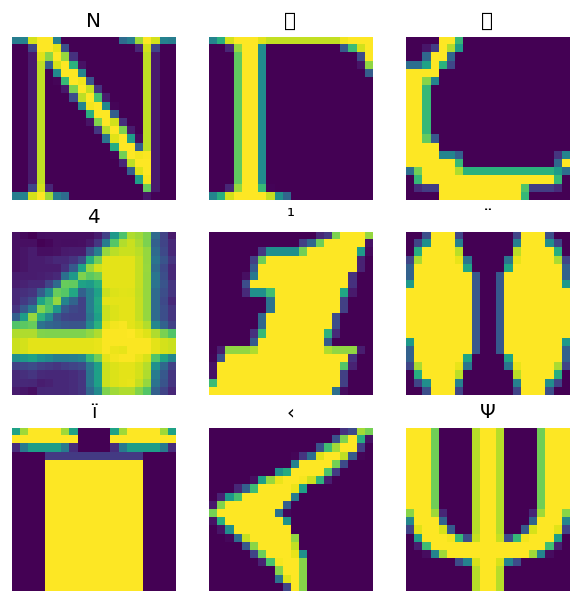

In [49]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,6), dpi=120)

for n in range(9):
  plt.subplot(3,3,n+1)
  plt.imshow(features['image'][..., n])
  plt.title(chr(features['m_label'][n]))
  plt.axis('off')

## Lower level functions

So far this tutorial has focused on the highest-level utilities for reading csv data. There are other two APIs that may be helpful for advanced users if your use-case doesn't fit the basic patterns.

* `tf.io.decode_csv`: a function for parsing lines of text into a list of CSV column tensors.
* `tf.data.experimental.CsvDataset`: a lower-level CSV dataset constructor.

This section recreates functionality provided by `tf.data.experimental.make_csv_dataset`, to demonstrate how this lower-level functionality can be used.


### `tf.io.decode_csv`

This function decodes a string, or list of strings into a list of columns.

Unlike `tf.data.experimental.make_csv_dataset` this function does not try to guess column data-types. You specify the column types by providing a list of `record_defaults` containing a value of the correct type, for each column.

To read the Titanic data **as strings** using `tf.io.decode_csv` you would say:

In [50]:
text = pathlib.Path(titanic_file_path).read_text()
lines = text.split('\n')[1:-1]

all_strings = [str()]*10
all_strings

['', '', '', '', '', '', '', '', '', '']

In [51]:
features = tf.io.decode_csv(lines, record_defaults=all_strings) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


To parse them with their actual types, create a list of `record_defaults` of the corresponding types: 

In [52]:
print(lines[0])

0,male,22.0,1,0,7.25,Third,unknown,Southampton,n


In [53]:
titanic_types = [int(), str(), float(), int(), int(), float(), str(), str(), str(), str()]
titanic_types

[0, '', 0.0, 0, 0, 0.0, '', '', '', '']

In [54]:
features = tf.io.decode_csv(lines, record_defaults=titanic_types) 

for f in features:
  print(f"type: {f.dtype.name}, shape: {f.shape}")

type: int32, shape: (627,)
type: string, shape: (627,)
type: float32, shape: (627,)
type: int32, shape: (627,)
type: int32, shape: (627,)
type: float32, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)
type: string, shape: (627,)


Note: It is more efficient to call `tf.io.decode_csv` on large batches of lines than on individual lines of CSV text.

### `tf.data.experimental.CsvDataset`

The `tf.data.experimental.CsvDataset` class provides a minimal CSV `Dataset` interface without the convenience features of the `tf.data.experimental.make_csv_dataset` function: column header parsing, column type-inference, automatic shuffling, file interleaving.

This constructor uses `record_defaults` the same way as `tf.io.decode_csv`:


In [55]:
simple_titanic = tf.data.experimental.CsvDataset(titanic_file_path, record_defaults=titanic_types, header=True)

for example in simple_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


The above code is basically equivalent to:

In [56]:
def decode_titanic_line(line):
  return tf.io.decode_csv(line, titanic_types)

manual_titanic = (
    # Load the lines of text
    tf.data.TextLineDataset(titanic_file_path)
    # Skip the header row.
    .skip(1)
    # Decode the line.
    .map(decode_titanic_line)
)

for example in manual_titanic.take(1):
  print([e.numpy() for e in example])

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']


#### Multiple files

To parse the fonts dataset using `tf.data.experimental.CsvDataset`, you first need to determine the column types for the `record_defaults`. Start by inspecting the first row of one file:

In [57]:
font_line = pathlib.Path(font_csvs[0]).read_text().splitlines()[1]
print(font_line)

AGENCY,AGENCY FB,64258,0.400000,0,0.000000,35,21,51,22,20,20,1,1,1,21,101,210,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1,1,1,93,255,255,255,176,146,146,146,146,146,146,146,146,216,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,141,141,141,182,255,255,255,172,141,141,141,115,1,1,1,1,163,255,255,255,255,255,255,255,255,255,255,255,255,255,255,209,1,1,1,1,163,255,255,255,6,6,6,96,255,255,255,74,6,6,6,5,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1,1,1,1,163,255,255,255,1,1,1,93,255,255,255,70,1,1,1,1,1

Only the first two fields are strings, the rest are integers or floats, and you can get the total number of features by counting the commas:

In [58]:
num_font_features = font_line.count(',')+1
font_column_types = [str(), str()] + [float()]*(num_font_features-2)

The `tf.data.experimental.CsvDataset` constructor can take a list of input files, but reads them sequentially. The first file in the list of CSVs is `AGENCY.csv`:

In [59]:
font_csvs[0]

'fonts/AGENCY.csv'

So, when you pass the list of files to `CsvDataset`, the records from `AGENCY.csv` are read first:

In [60]:
simple_font_ds = tf.data.experimental.CsvDataset(
    font_csvs, 
    record_defaults=font_column_types, 
    header=True)

In [61]:
for row in simple_font_ds.take(10):
  print(row[0].numpy())

b'AGENCY'
b'AGENCY'
b'AGENCY'


b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'
b'AGENCY'


To interleave multiple files, use `Dataset.interleave`.

Here's an initial dataset that contains the CSV file names: 

In [62]:
font_files = tf.data.Dataset.list_files("fonts/*.csv")

This shuffles the file names each epoch:

In [63]:
print('Epoch 1:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')
print()

print('Epoch 2:')
for f in list(font_files)[:5]:
  print("    ", f.numpy())
print('    ...')

Epoch 1:
     b'fonts/BRITANNIC.csv'
     b'fonts/COMIC.csv'
     b'fonts/GEORGIA.csv'
     b'fonts/CAARD.csv'
     b'fonts/NIAGARA.csv'
    ...

Epoch 2:


 b'fonts/STYLUS.csv'
     b'fonts/FREESTYLE.csv'
     b'fonts/BODONI.csv'
     b'fonts/VIVALDI.csv'
     b'fonts/HANDPRINT.csv'
    ...


The `interleave` method takes a `map_func` that creates a child-`Dataset` for each element of the parent-`Dataset`.

Here, you want to create a `tf.data.experimental.CsvDataset` from each element of the dataset of files:

In [64]:
def make_font_csv_ds(path):
  return tf.data.experimental.CsvDataset(
    path, 
    record_defaults=font_column_types, 
    header=True)

The `Dataset` returned by interleave returns elements by cycling over a number of the child-`Dataset`s. Note, below, how the dataset cycles over `cycle_length=3` three font files:

In [65]:
font_rows = font_files.interleave(make_font_csv_ds,
                                  cycle_length=3)

In [66]:
fonts_dict = {'font_name':[], 'character':[]}

for row in font_rows.take(10):
  fonts_dict['font_name'].append(row[0].numpy().decode())
  fonts_dict['character'].append(chr(row[2].numpy()))

pd.DataFrame(fonts_dict)

/tmpfs/tmp/ipykernel_75195/998453860.py:5: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  fonts_dict['character'].append(chr(row[2].numpy()))


,font_name,character
0,IMPACT,ﬄ
1,TXT,⌂
2,CREDITCARD,1
3,IMPACT,ﬃ
4,TXT,≤
5,CREDITCARD,4
6,IMPACT,ﬂ
7,TXT,∞
8,CREDITCARD,1
9,IMPACT,ﬁ


#### Performance


Earlier, it was noted that `tf.io.decode_csv` is more efficient when run on a batch of strings.

It is possible to take advantage of this fact, when using large batch sizes, to improve CSV loading performance (but try [caching](#caching) first).

With the built-in loader 20, 2048-example batches take about 17s. 

In [67]:
BATCH_SIZE=2048
fonts_ds = tf.data.experimental.make_csv_dataset(
    file_pattern = "fonts/*.csv",
    batch_size=BATCH_SIZE, num_epochs=1,
    num_parallel_reads=100)

In [68]:
%%time
for i,batch in enumerate(fonts_ds.take(20)):
  print('.',end='')

print()

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


CPU times: user 49.5 s, sys: 4.33 s, total: 53.8 s
Wall time: 21.1 s


Passing **batches of text lines** to`decode_csv` runs faster, in about 5s:

In [69]:
fonts_files = tf.data.Dataset.list_files("fonts/*.csv")
fonts_lines = fonts_files.interleave(
    lambda fname:tf.data.TextLineDataset(fname).skip(1), 
    cycle_length=100).batch(BATCH_SIZE)

fonts_fast = fonts_lines.map(lambda x: tf.io.decode_csv(x, record_defaults=font_column_types))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [70]:
%%time
for i,batch in enumerate(fonts_fast.take(20)):
  print('.',end='')

print()

....................


CPU times: user 4.52 s, sys: 63.1 ms, total: 4.58 s
Wall time: 759 ms


For another example of increasing CSV performance by using large batches, refer to the [Overfit and underfit tutorial](../keras/overfit_and_underfit.ipynb).

This sort of approach may work, but consider other options like `Dataset.cache` and `tf.data.Dataset.snapshot`, or re-encoding your data into a more streamlined format.